### 필수분석 2-b 는 코드 작동하는데 

### 최소 3분부터 최대 5분정도 걸려서 파일 분리하였습니다.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# 넘파이, 판다스 불러오기
import numpy as np
import pandas as pd
#시각화코드
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter
# 한국어 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트의 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


In [3]:
df= pd.read_csv('미니프로젝트-쇼핑몰 실습데이터.csv', encoding= 'euc_kr')

C:\Users\simhyunji\AppData\Local\Temp\ipykernel_23760\2732426816.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('미니프로젝트-쇼핑몰 실습데이터.csv', encoding= 'euc_kr')


In [4]:
# 데이터 형 변형
df['주문일자']= pd.to_datetime(df['주문일자'])
df['주문수량'] = df['주문수량'].str.replace(',', '')
df['주문수량'] = df['주문수량'].astype(float)
df['판매금액'] = df['판매금액'].str.replace(',', '')
df['판매금액'] = df['판매금액'].astype(float)

In [5]:
# 데이터 형 변형
df['판매금액'] = df['판매금액'].astype(int)

In [6]:
#로그변환
df['로그_판매금액'] = np.log1p(df['판매금액'])

In [7]:
# 지니 업체명 통일
df['업체명'] = df['업체명'].str.replace('지니 태블릿', '지니')
df['업체명'] = df['업체명'].str.replace('지니(후불집행)', '지니',regex=False) # 파이썬 3.9.13 버전에서 작성하여 regex=False 옵션을 주었습니다. * 최신버전은 옵션을 주지 않아도 괜찮음

In [8]:
df['주문일자'] = pd.to_datetime(df['주문일자'])

In [9]:
# 엄체명, 상품명, 결제방법 데이터 삭제
df= df.dropna(subset=['업체명'])
df= df.dropna(subset=['상품명'])
df= df.dropna(subset=['결제방법'])

# 월별순수익

In [10]:
df = df.loc[df['처리상태'] == '구매확정']

In [11]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,N,NaN,NaN,8.517393
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,8.517393
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,11.119898
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,10.308986
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,6.621406


In [12]:
df.value_counts('할부기간')

할부기간
12개월    678
1개월     400
6개월     326
24개월    173
18개월     13
dtype: int64

In [13]:
# '개월'이라는 단어가 포함된 문자열에서 
# '개월'을 제거하고 남은 문자열을 정수형으로 변환하여 반환
def convert_installment(installment):
    if pd.notna(installment):
        if '개월' in str(installment):
            return int(str(installment).replace('개월', ''))
    return 0

In [14]:
df['할부기간_숫자'] = df['할부기간'].apply(convert_installment)

In [15]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,할부기간_숫자
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,N,NaN,NaN,8.517393,0
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,8.517393,0
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,11.119898,0
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,10.308986,0
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,6.621406,0


In [16]:
df = df[['업체명' , '로그_판매금액', '주문일자', '할부기간_숫자']]

In [17]:
df

,업체명,로그_판매금액,주문일자,할부기간_숫자
0,지니,8.517393,2019-12-13,0
1,지니,8.517393,2019-12-16,0
2,지니,11.119898,2019-12-16,0
3,지니,10.308986,2019-12-16,0
4,지니,6.621406,2019-12-16,0
...,...,...,...,...
217852,다우기술,9.862718,2022-11-06,0
217914,다우기술,7.844241,2022-11-07,0
217927,다우기술,7.496097,2022-11-07,0
217938,다우기술,8.131825,2022-11-07,0


In [18]:
# 36개의 컬럼 생성
for i in range(1, 37): # 1부터 36까지의 컬럼 생성
    df[str(i).zfill(2)] = 0  #숫자를 문자열로 변환, zfill로 2자리 맞춤

# 데이터 채우기
for index, row in df.iterrows(): #df를 순회하며 각 행에 대한 작업 수행
    if row['할부기간_숫자'] == 0: # 할부기간이 0이면 할부가 아니므로
        month_start = row['주문일자'].month #주문일자를 기준으로 한 개월치 채움
        for i in range(1, 37):
            df.at[index, str(i).zfill(2)] = row['로그_판매금액'] if i == month_start else 0
    else:
        installment_amount = row['로그_판매금액'] / row['할부기간_숫자']
        month_start = row['주문일자'].month
        for i in range(month_start + 1, month_start + row['할부기간_숫자'] + 1):
            df.at[index, str(i % 36).zfill(2)] = installment_amount

# 결과 출력
df.head()

,업체명,로그_판매금액,주문일자,할부기간_숫자,01,02,03,04,05,06,...,28,29,30,31,32,33,34,35,36,00
0,지니,8.517393,2019-12-13,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,지니,8.517393,2019-12-16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
2,지니,11.119898,2019-12-16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,지니,10.308986,2019-12-16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
4,지니,6.621406,2019-12-16,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


In [19]:
pd.set_option("display.max_columns", None)

In [20]:
df.loc[df['할부기간_숫자'] == 6]

,업체명,로그_판매금액,주문일자,할부기간_숫자,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,00
32069,지니,13.987783,2020-12-08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.331297,2.331297,2.331297,2.331297,2.331297,2.331297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
32079,지니,12.889172,2020-12-08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.148195,2.148195,2.148195,2.148195,2.148195,2.148195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
32081,지니,14.498608,2020-12-08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.416435,2.416435,2.416435,2.416435,2.416435,2.416435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
32104,지니,12.889172,2020-12-08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.148195,2.148195,2.148195,2.148195,2.148195,2.148195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
32138,지니,12.889172,2020-12-08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.148195,2.148195,2.148195,2.148195,2.148195,2.148195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200888,천재태블릿,13.987783,2022-09-27,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.331297,2.331297,2.331297,2.331297,2.331297,2.331297,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
203088,천재태블릿,14.498608,2022-10-04,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.416435,2.416435,2.416435,2.416435,2.416435,2.416435,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
203405,천재태블릿,12.889172,2022-10-04,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.148195,2.148195,2.148195,2.148195,2.148195,2.148195,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
209816,천재태블릿,12.889172,2022-10-20,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.148195,2.148195,2.148195,2.148195,2.148195,2.148195,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


In [21]:
month_sums = {}
for i in range(12):
    remainder_columns = [str(j).zfill(2) for j in range(1, 37) if j % 12 == i]
    month_sum = df[remainder_columns].sum().sum()
    month_sums[f'month{i+1}'] = month_sum

# 결과 출력
for key, value in month_sums.items():
    print(f'{key}: {value}')

month1: 102125.50635645002
month2: 96737.4832253836
month3: 130568.41448443808
month4: 127025.03282768464
month5: 125326.36401018695
month6: 128735.90058837415
month7: 120055.164170445
month8: 134654.80778962636
month9: 154995.18210066488
month10: 133672.31291500136
month11: 139598.67903111587
month12: 89116.79830529759


In [22]:
month_sums = {f"{i+1}": df[f"{i+1:02}"].sum().sum() for i in range(12)}

# 결과를 데이터프레임으로 변환
total_df = pd.DataFrame(list(month_sums.items()), columns=['Month', 'Total'])

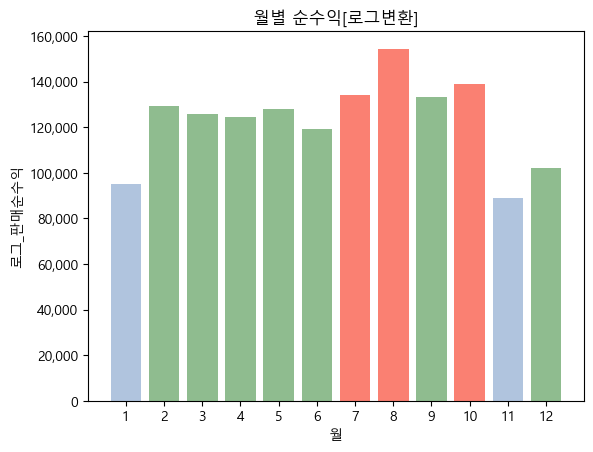

In [23]:
from matplotlib.ticker import FuncFormatter
# 시각화
colors = ['lightsteelblue', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen',
          'salmon', 'salmon', 'darkseagreen', 'salmon', 'lightsteelblue', 'darkseagreen']
plt.bar(total_df['Month'], total_df['Total'], color=colors)
plt.xlabel('월')
plt.ylabel('로그_판매순수익')
plt.title('월별 순수익[로그변환]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.show()